<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [3]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
file_path = "boston_housing.csv"
data = pd.read_csv(file_path)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


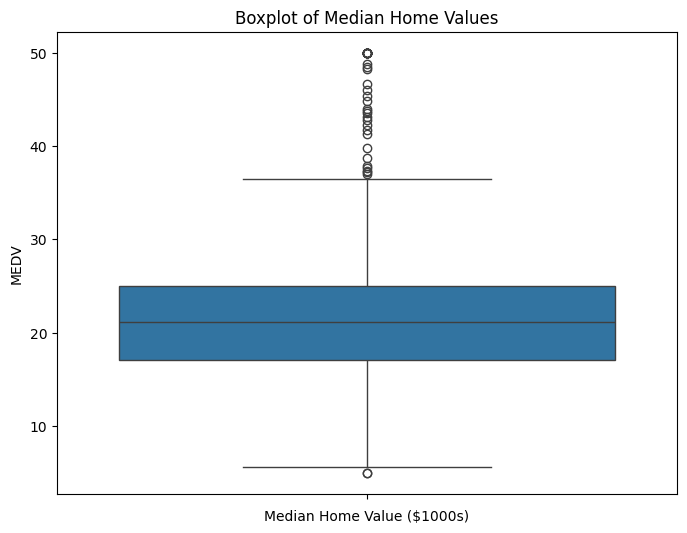

In [6]:
plt.figure(figsize=(8, 6))
sns.boxplot(data['MEDV'])
plt.title('Boxplot of Median Home Values')
plt.xlabel('Median Home Value ($1000s)')
plt.show()

#the distribution of median home values in the dataset, showing the range, median, and any potential outliers present.

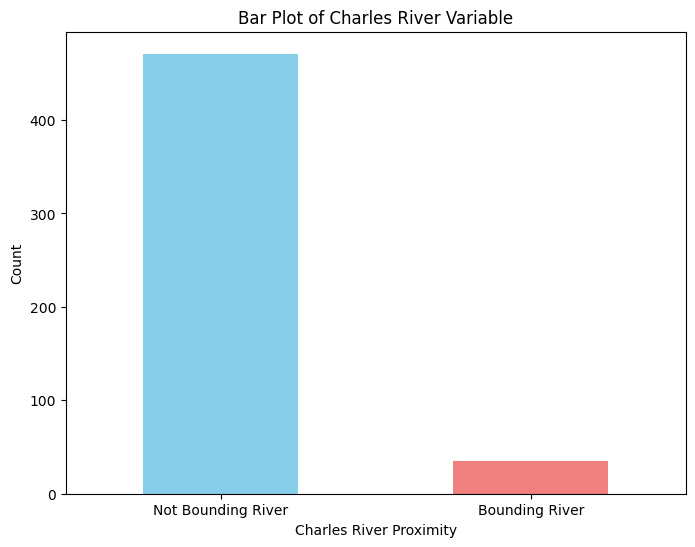

In [7]:
plt.figure(figsize=(8, 6))
data['CHAS'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Bar Plot of Charles River Variable')
plt.xlabel('Charles River Proximity')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Bounding River', 'Bounding River'], rotation=0)
plt.show()

#the majority of observations in the dataset do not border the Charles River, while a minority do, indicating a clear discrepancy in proximity to the river among the sampled towns.

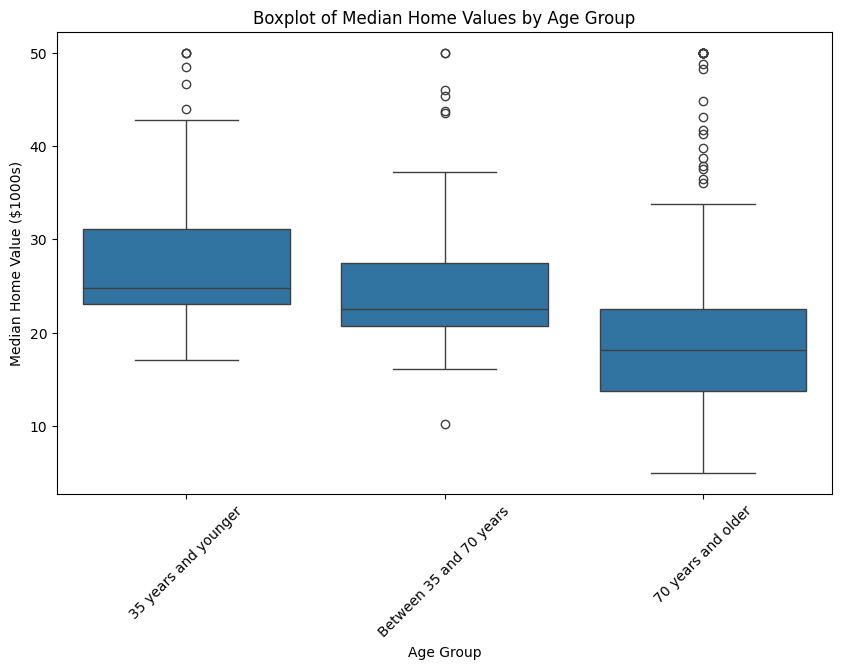

In [8]:
data['AGE_group'] = pd.cut(data['AGE'], bins=[0, 35, 70, data['AGE'].max()], labels=['35 years and younger', 'Between 35 and 70 years', '70 years and older'])

plt.figure(figsize=(10, 6))
sns.boxplot(x='AGE_group', y='MEDV', data=data)
plt.title('Boxplot of Median Home Values by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Home Value ($1000s)')
plt.xticks(rotation=45)
plt.show()

#  distribution of median home values across different age groups of owner-occupied units, indicating potential variations in home values based on the age of the properties.

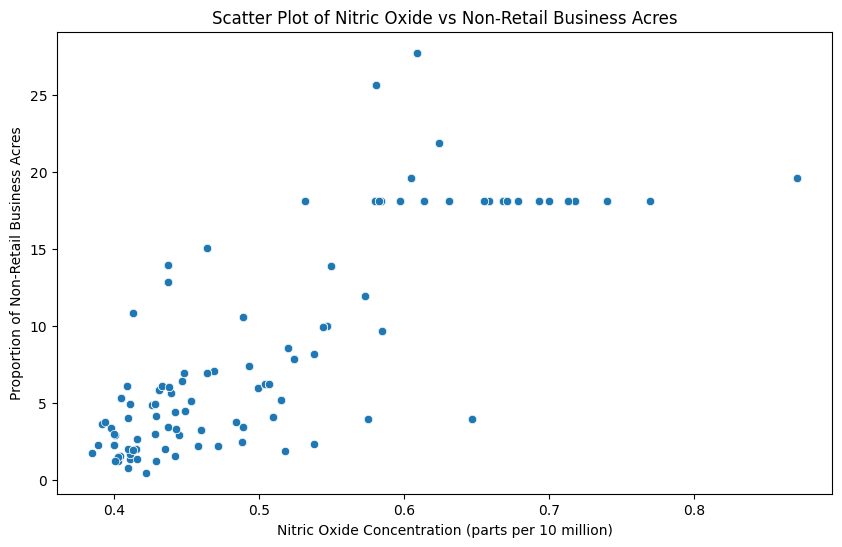

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='NOX', y='INDUS', data=data)
plt.title('Scatter Plot of Nitric Oxide vs Non-Retail Business Acres')
plt.xlabel('Nitric Oxide Concentration (parts per 10 million)')
plt.ylabel('Proportion of Non-Retail Business Acres')
plt.show()
 # the relationship between nitric oxide concentrations and the proportion of non-retail business acres per town, indicating whether there is a correlation between these two variables.

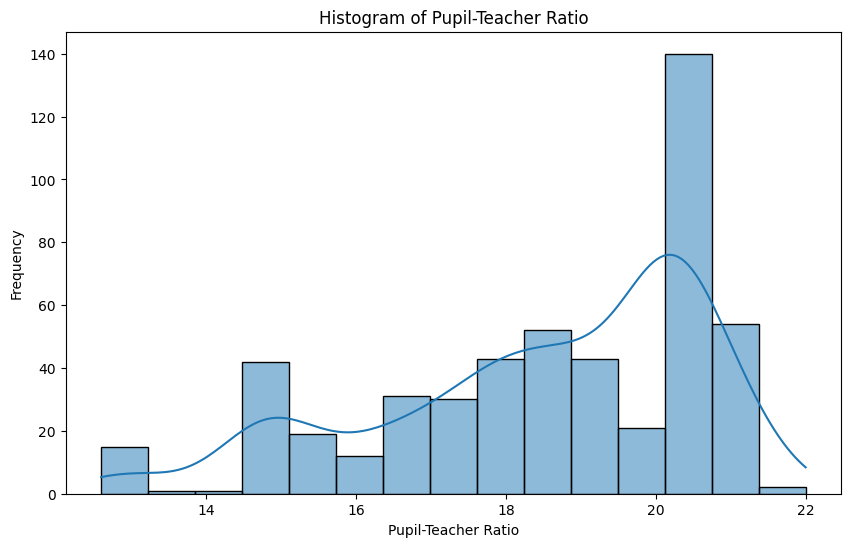

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(data['PTRATIO'], bins=15, kde=True)
plt.title('Histogram of Pupil-Teacher Ratio')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')
plt.show()

# The histogram visualizes the distribution of pupil-teacher ratios in the dataset, providing insight into the frequency of different pupil-teacher ratio ranges across the observations.

In [11]:
# Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
# Hypothesis:
# (H0): There is no significant difference in median house values between houses bounded by the Charles River and those not bounded by it.
# (H1): There is a significant difference in median house values between houses bounded by the Charles River and those not bounded by it.
# Test Statistics:
from scipy.stats import ttest_ind
bounded = data[data['CHAS'] == 1]['MEDV']
not_bounded = data[data['CHAS'] == 0]['MEDV']
t_stat, p_value = ttest_ind(bounded, not_bounded)

print("T-statistic:", t_stat)
print("P-value:", p_value)
if p_value < 0.05:
    print("Conclusion: Reject H0")
else:
    print("Conclusion: Fail to reject H0")
    # Conclusion:
# conclusopn: reject the null hypothesis and conclude that there is a significant difference in median house values.

T-statistic: 3.996437466090509
P-value: 7.390623170519905e-05
Conclusion: Reject H0


In [12]:
# Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
# Hypothesis:
# (H0): There is no significant difference in median house values among different age groups of owner-occupied units.
# (H1): There is a significant difference in median house values among different age groups of owner-occupied units.
# Test Statistics:
from scipy.stats import f_oneway
age_groups = [data[data['AGE_group'] == group]['MEDV'] for group in data['AGE_group'].unique()]
f_stat, p_value = f_oneway(*age_groups)
print("F-statistic:", f_stat)
print("P-value:", p_value)
if p_value < 0.05:
    print("Conclusion: Reject H0")
else:
    print("Conclusion: Fail to reject H0")
# Conclusion:
# reject the null hypothesis and conclude that there is a significant difference in median house values among different age groups.

F-statistic: 36.40764999196599
P-value: 1.7105011022702984e-15
Conclusion: Reject H0


In [17]:
# Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
# Hypothesis:
# (H0): There is no significant correlation between nitric oxide concentrations and proportion of non-retail business acres per town.
# (H1): There is a significant correlation between nitric oxide concentrations and proportion of non-retail business acres per town.
# Test Statistics:
from scipy.stats import pearsonr
corr_coef, p_value = pearsonr(data['NOX'], data['INDUS'])
print("Pearson correlation coefficient:", corr_coef)
print("P-value:", p_value)
if p_value > 0.05:
    print("Conclusion: Fail to reject H0")
else:
    print("Conclusion: Reject the HO")
# conclusion:
# fail to reject the null hypothesis and conclude that there is no significant correlation.

Pearson correlation coefficient: 0.7636514469209192
P-value: 7.913361061210442e-98
Conclusion: Reject the HO


In [21]:
# What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
# Hypothesis:
#  (H0): There is no significant impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes.
#  (H1): There is a significant impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes.
# Test Statistics:
import statsmodels.api as sm
X = sm.add_constant(data['DIS']) 
y = data['MEDV']
model = sm.OLS(y, X).fit()
print(model.summary())
# Conclusion:
# Perform a multiple linear regression analysis with a significance level of α = 0.05. If the p-value associated with the coefficient of the weighted distance variable is less than 0.05, reject the null hypothesis and conclude that there is a significant impact.

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 14 Apr 2024   Prob (F-statistic):           1.21e-08
Time:                        23:29:10   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0